# Simple Plot

https://github.com/koldunovn/python_for_geosciences/blob/master/05%20-%20Graphs%20and%20maps%20(Matplotlib%20and%20Basemap).ipynb

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

In [2]:
from netCDF4 import Dataset


In [3]:
f = Dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.2012.nc')

In [4]:
air = f.variables['air']
lat = f.variables['lat'][:]
lon = f.variables['lon'][:]

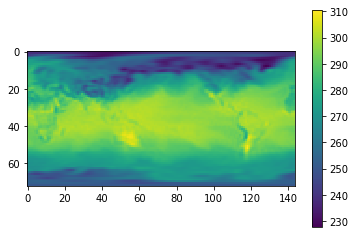

In [5]:
plt.imshow(air[0,:,:])
plt.colorbar();

In [6]:
air_c = air[:]  - 273.15


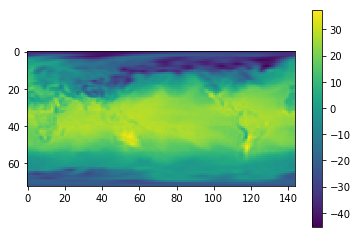

In [7]:
plt.imshow(air_c[0,:,:])
plt.colorbar()

# Plot with cartopy

https://github.com/koldunovn/python_for_geosciences/blob/master/07%20-%20Other%20modules%20for%20geoscientists.ipynb

In [8]:
import cartopy
import cartopy.crs as ccrs

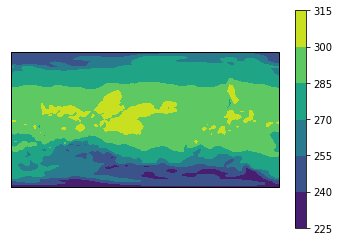

In [9]:
#ax = plt.axes(projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.Mollweide())
plt.contourf(air[0,:,:])
ax.coastlines()
plt.colorbar()


# Plot with Cartopy and Iris

In [15]:
import iris
import iris.quickplot as qplt

In [16]:
iris.FUTURE.netcdf_promote = True
temperature = iris.load_cube('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.2012.nc')



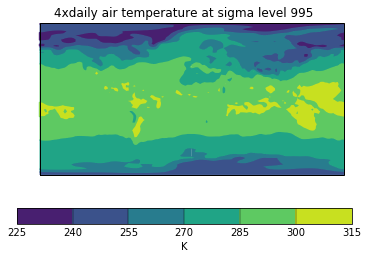

In [19]:
qplt.contourf(temperature[0,:,:])
#gca().coastlines()

In [20]:
zonal_mean = temperature.collapsed('latitude', iris.analysis.MEAN)


/home/pingu/.conda/envs/workshop/lib/python2.7/site-packages/iris/cube.py:3281: UserWarning: Collapsing spatial coordinate u'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/pingu/.conda/envs/workshop/lib/python2.7/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'latitude'.
  warnings.warn(msg.format(self.name()))


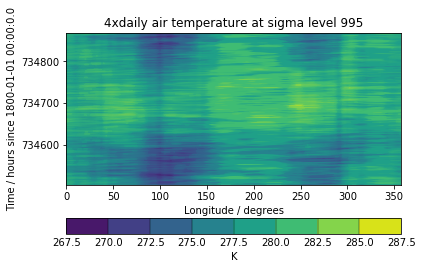

In [21]:
qplt.contourf(zonal_mean)

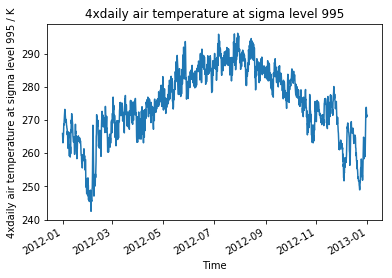

In [23]:
#Code is a bit more complicated in order to fix issue with dates formating
fig = plt.figure()
qplt.plot(temperature[:,10,10])
fig.autofmt_xdate()

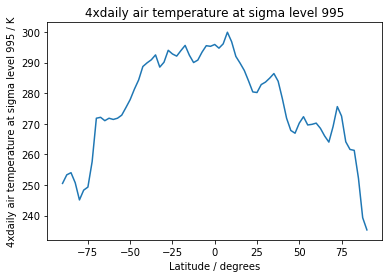

In [24]:
qplt.plot(temperature[0,:,10])